In [1]:
import os
from tqdm import tqdm
import numpy as np
import pickle as pkl
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import display, Image

def draw_mols(mol):
    d2d = rdMolDraw2D.MolDraw2DCairo(300, 300)  # 使用Cairo绘制器
    opts = d2d.drawOptions()
    opts.addAtomIndices=False
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    
    # 获取绘图数据
    data = d2d.GetDrawingText()
    
    # 使用IPython的Image显示功能来展示图像
    display(Image(data=data, format='png'))
    
def read_energy(filename):
    energies = []

    with open(filename, 'r') as file:
        lines = file.readlines()
        step = 0
        for line in lines:
            if line.strip().startswith("energy"):
                energy = float(line.split()[1])
                energies.append(energy)
                step += 1
                
    return np.array(energies), step

def parser_xtb_results(dir_path):
    dir_list = os.listdir(dir_path)
    tqdmer = tqdm(dir_list)
    save_list = []
    for dir_name in tqdmer:
        save_dir = os.path.join(dir_path, dir_name)
        if os.path.exists(os.path.join(save_dir, "xtbopt.xyz")) and os.path.exists(os.path.join(save_dir, "xtbscan.log")):
            mol = Chem.rdmolfiles.MolFromXYZFile(os.path.join(save_dir, "xtbopt.xyz"))
            elist, steps = read_energy(os.path.join(save_dir, "xtbscan.log"))
            ebar = elist.max() - elist.min()
            save_list.append({
                "id": dir_name,
                "mol": mol,
                "energy": ebar
            })
        else:
            continue
    with open("xtb_results.pkl", "wb+") as f:
        pkl.dump(save_list, f)

### Test

Text(0.5, 1.0, '21.179572785801422')

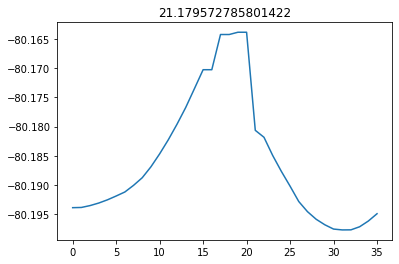

In [2]:
from matplotlib import pyplot as plt

root_dir = "./xtb_cal_mols"
dir_list = os.listdir("./xtb_cal_mols")
index = 0
save_dir = os.path.join(root_dir, dir_list[index])
mol = Chem.rdmolfiles.MolFromXYZFile(os.path.join(save_dir, "xtbopt.xyz"))
elist, steps = read_energy(os.path.join(save_dir, "xtbscan.log"))
ebar = elist.max() - elist.min()

plt.plot(elist)
plt.title(ebar * 627.5095)

### merge results

In [2]:
import glob
import rdkit
import pickle as pkl

xtb_results_all = []
file_list = glob.glob("./xtb_results*.pkl")

In [3]:
for file in file_list:
    with open(file, "rb") as f:
        d = pkl.load(f)
    xtb_results_all.extend(d)

: 